In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Comma Data Updated Headers.csv')

In [4]:
df.head()

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(subset = ['Gender', 'Age'])
series = df.groupby(["Gender", "Age"]).transform(lambda x: x.fillna(x.value_counts().index[0]))

In [6]:
type(series)

pandas.core.frame.DataFrame

In [7]:
df2 = series.dropna()
df3 = pd.get_dummies(series)
df3.head(1)

,RespondentID,"Sentence_It's important for a person to be honest, kind and loyal.","Sentence_It's important for a person to be honest, kind, and loyal.",OxfordCommaHeard_No,OxfordCommaHeard_Yes,OxfordCommaCare_A lot,OxfordCommaCare_Not at all,OxfordCommaCare_Not much,OxfordCommaCare_Some,"Unnamed: 4_Some experts say it's important to drink milk, but the data are inconclusive.",...,Education_Some college or Associate degree,Location_East North Central,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,3292953864,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
#rename column names
df3 = df3.rename(index = str, columns ={"Sentence_It's important for a person to be honest, kind, and loyal.": "Oxford Comma Use", 
                                        "OxfordCommaHeard_No": "Heard of Oxford Comma No",
                                        "OxfordCommaHeard_Yes":"Heard of Oxford Comma",
                                        "OxfordCommaCare_Not at all" : "Oxford Care - Not at all", 
                                        "OxfordCommaCare_Not much" : "Oxford Care - Not much",
                                        "OxfordCommaCare_A lot": "Oxford Care - A Lot",
                                        "OxfordCommaCare_Some" : "Oxford Care - Some",
                                        "Unnamed: 4_Some experts say it's important to drink milk, but the data is inconclusive." : "Data Use",
                                        "DataPlural_No": "Data is not Plural",
                                        "DataPlural_Yes": "Data is Plural",
                                        "DataPluralCare_A lot":  "Data Plural Care -A lot",
                                        "DataPluralCare_Not at all": "Data Plural Care - Not at all",
                                        "DataPluralCare_Not much" : "Data Plural Care - Not much",
                                        "DataPluralCare_Some" : "Data Plural Care - Some",
                                        "GrammarImportance_Neither important nor unimportant (neutral)": "Grammar - neutral",
                                        "GrammarImportance_Somewhat important": "Grammar - Somewhat Important",
                                        "GrammarImportance_Somewhat unimportant": "Grammar - Somewhat Unimportant",
                                        "GrammarImportance_Very important": "Grammar - Very Important",
                                        "GrammarImportance_Very unimportant": "Grammar - Very Unimportant",
                                        "Education_Bachelor degree": "Bachelor Degree",
                                        "Education_Graduate degree": "Graduate Degree",
                                        "Education_High school degree" : "High School Degree", 
                                        "Education_Less than high school degree" : "Less than HS Degree",
                                        "Education_Some college or Associate degree": "Some college/Associate Degree"})
df3.head(1)

,RespondentID,"Sentence_It's important for a person to be honest, kind and loyal.",Oxford Comma Use,Heard of Oxford Comma No,Heard of Oxford Comma,Oxford Care - A Lot,Oxford Care - Not at all,Oxford Care - Not much,Oxford Care - Some,"Unnamed: 4_Some experts say it's important to drink milk, but the data are inconclusive.",...,Some college/Associate Degree,Location_East North Central,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,3292953864,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
df3.to_csv('clean_data.csv')

In [10]:
y = df3["Oxford Comma Use"]
x = df3.drop(["Oxford Comma Use", "RespondentID"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42, stratify=y)

In [34]:
comma = df2
comma['Sentence'] = comma['Sentence'].replace("It's important for a person to be honest, kind, and loyal.", 1).replace("It's important for a person to be honest, kind and loyal.", 0)

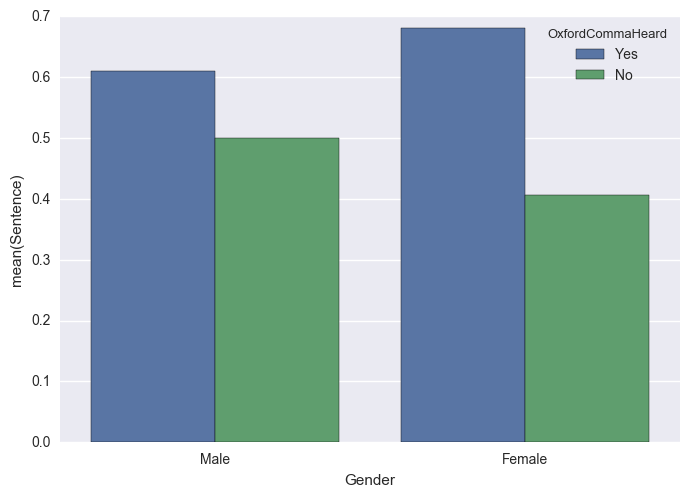

In [23]:
sns.barplot(x="Gender", y="Sentence", hue="OxfordCommaHeard", data=comma, ci = None)

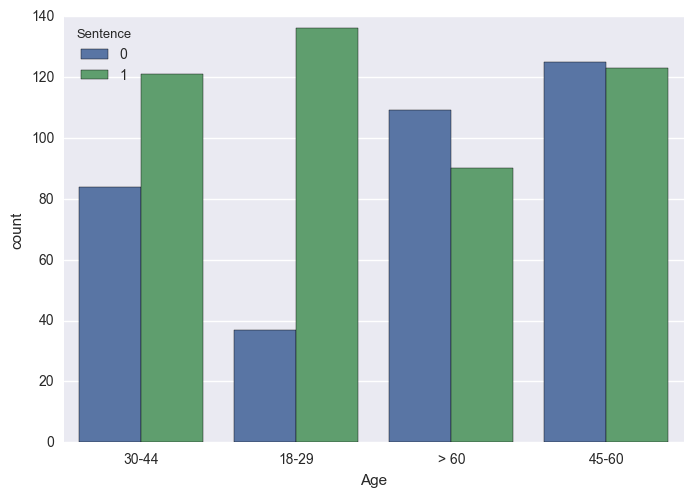

In [24]:
sns.countplot(x="Age", data=comma, hue = 'Sentence');

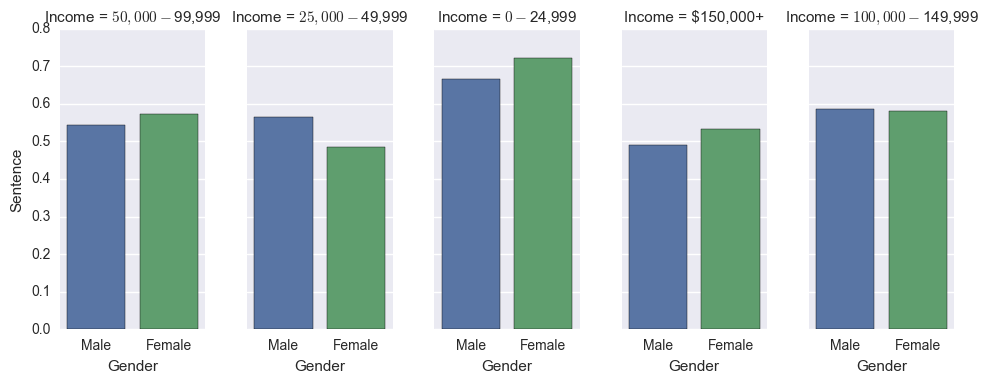

In [25]:
sns.factorplot(x="Gender", y="Sentence", 
               col="Income", data=comma, kind="bar", size=4, aspect=.5, ci=None)

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 208 points : 0


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Creates params for SearchCV
param_grid_Ridge = {'polynomialfeatures__degree': np.arange(3),
                    'ridge__alpha': [.1, .2, .3, .4, .5, .6, .7, .8]}
#Creates Pipeline 
ridgeModel = make_pipeline(StandardScaler(),
                           PolynomialFeatures(),
                           Ridge(max_iter=10000))
#Creates Ridge object with the SearchCV
ridgeSearch = RandomizedSearchCV(ridgeModel, param_grid_Ridge)
#finds best params
ridgeSearch.fit(x_train,y_train);
#prints best params 
print(ridgeSearch.best_params_)
#scores training and test sets
scoresRidgeTrain = cross_val_score(ridgeSearch, x_test, x_test)
#prints the score of the training set
scoresRidgeTrain.mean()

{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1}


0.99532418349814555

In [33]:
import numpy as np
import statsmodels.api as sm

# Fit regression model
results = sm.OLS(y_train, x_train).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Oxford Comma Use   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.979e+30
Date:                Wed, 12 Apr 2017   Prob (F-statistic):               0.00
Time:                        23:17:49   Log-Likelihood:                 26963.
No. Observations:                 829   AIC:                        -5.386e+04
Df Residuals:                     798   BIC:                        -5.372e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------

In [39]:
#runs SVC model 
from sklearn.svm import SVC
param_grid_svc = {'polynomialfeatures__degree': np.arange(3),   
              'svc__C': [0.5,0.75,1,2,3]}
svcModel = make_pipeline(StandardScaler(),
                           PolynomialFeatures(),
                           SVC())

svcSearchSVC = GridSearchCV(svcModel, param_grid_svc)
svcSearchSVC.fit(x_train,y_train);
print(svcSearchSVC.best_params_)
#scores training and test sets
# scoressvc = cross_val_score(svcSearchSVC, x_train, x_train)
scoressvc = cross_val_score(svcSearchSVC, x_test, y_test)
scoressvc.mean()

{'polynomialfeatures__degree': 1, 'svc__C': 0.5}


0.9855742296918768